### Here's an visualization of the K-Nearest Neighbors algorithm.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('teleCust1000t.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


# About the dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
* Basic Service
* E-Service
* Plus Service
* Total Service

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [46]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


## Data Visualization and Analysis

In [47]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

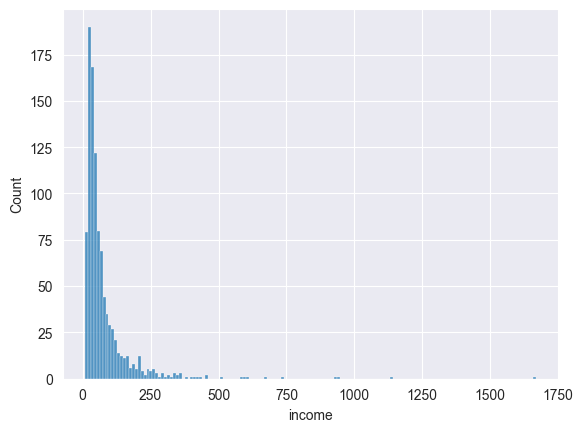

In [48]:
sns.histplot(data=df, x='income');
plt.xlabel('income');
plt.ylabel('Count');

In [49]:
new_df = df[df['income'] < 700]

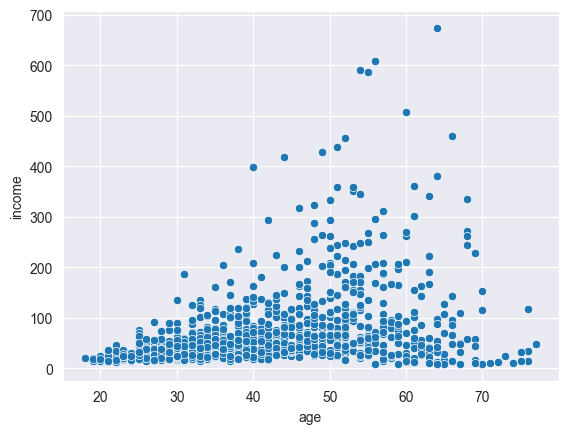

In [50]:
sns.scatterplot(data=new_df, x='age', y='income');

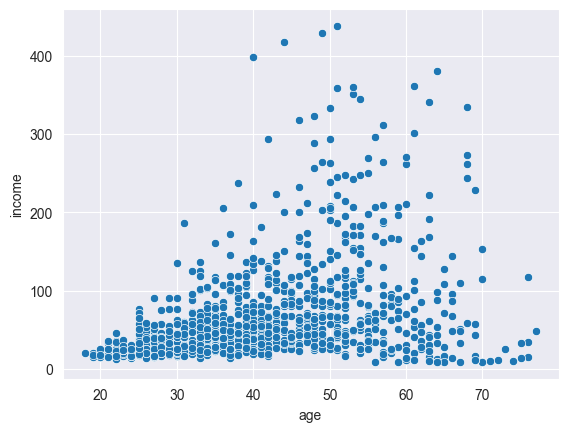

In [51]:
new_df = df[df['income'] < 450]
sns.scatterplot(data=new_df, x='age', y='income');


## Features selection

In [52]:
# Features selection
independent_x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values.astype(float)
independent_x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [53]:
dependent_y = df['custcat'].values
dependent_y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Model

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [54]:
from sklearn import preprocessing

## Normalize Data


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:
* preprocessing.StandardScaler()

This initializes a StandardScaler object from sklearn.preprocessing, which is used to standardize features.

* .fit(independent_x)

The .fit() method calculates the mean and standard deviation of each feature in independent_x.

* .transform(independent_x)

The .transform() method applies the standardization formula: (x-μ / σ ) --> where
𝜇 is the mean and 𝜎 is the standard deviation.

In [55]:
independent_x = preprocessing.StandardScaler().fit(independent_x).transform(independent_x.astype(float))
independent_x[0:3]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004]])

## Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(independent_x, dependent_y, test_size=0.2, random_state=4)
"""

independent_x: The features (input variables).

dependent_y: The target labels (output variable).

Variable	Description
x_train 	Training data (features)
x_test  	Testing data (features)
y_train 	Training labels (target values)
y_test	    Testing labels (target values)


20% of the data is used for testing (x_test, y_test).

The remaining 80% is used for training (x_train, y_train).

random_state=4: to not get different training and testing sets, when each time we run the code.

"""
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification

### K nearest neighbor (KNN)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Let's start the algorithm with k=4 for now:


In [59]:
k = 9
#Train Model and Predict
neigh = (KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train))
neigh


#  Initialize KNN Model, Creates an instance of the KNN classifier. (neigh = KNeighborsClassifier(n_neighbors = k)
#  Fits (trains) the KNN model using the training data (x_train, y_train) --> (input, output).


KNeighborsClassifier(n_neighbors=9)

### Predicting

We can use the model to make predictions on the test set:


In [60]:
y_hat = neigh.predict(x_test) # (input) to make predict
result = np.asarray(y_hat[np.random.randint(4)]) # These are the result of the predictions

if result == 1:
    print('in Basic Service')

elif result == 2:
    print('in E-Service')

elif result == 3:
    print('Plus Service')
elif result == 4:
    print('Total Service')

in E-Service


### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [61]:
from sklearn.metrics import jaccard_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

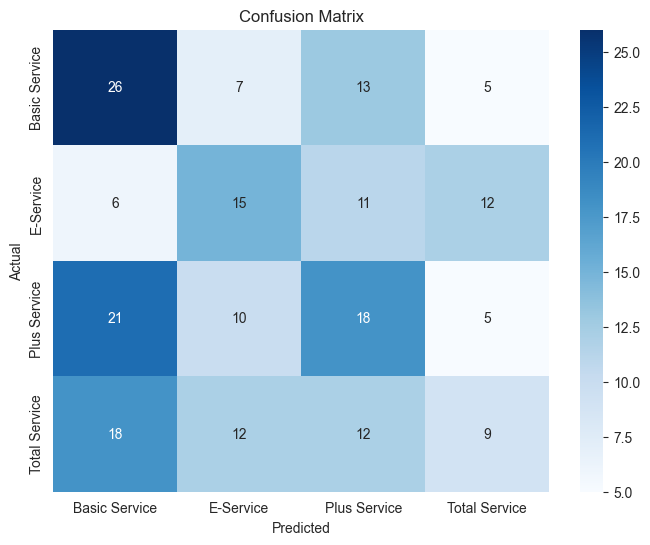

In [62]:
class_names = ['Basic Service', 'E-Service', 'Plus Service', 'Total Service']

cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [63]:
# 4 categories, which is why the confusion matrix is 4×4.

In [64]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.5025
Test set Accuracy:  0.34


In [65]:
jaccard = jaccard_score(y_test, y_hat, average='weighted')
print(f'Jaccard= {jaccard:.4f} ... closer to 1 means good accuracy ')

Jaccard= 0.1997 ... closer to 1 means good accuracy 


In [66]:
precision = precision_score(y_test, y_hat, average='weighted')
print(f'Precision= {precision:.4f} ... closer to 1 means good accuracy ')

Precision= 0.3324 ... closer to 1 means good accuracy 


In [67]:
recall = recall_score(y_test, y_hat, average='weighted')
print(f'Recall= {recall:.4f} ... closer to 1 means good accuracy ')

Recall= 0.3400 ... closer to 1 means good accuracy 


In [68]:
f1 = f1_score(y_test, y_hat, average='weighted')
print(f'F1-Score= {f1:.4f} ... closer to 1 means good accuracy ')


F1-Score= 0.3297 ... closer to 1 means good accuracy 


In [69]:
# Compute Log Loss (requires probability estimates, not just class labels)
y_hat_proba = neigh.predict_proba(x_test)
logloss = log_loss(y_test, y_hat_proba)
print(f'Log Loss {logloss:.4f} ... closer to 0 means good accuracy ')

Log Loss 2.3404 ... closer to 0 means good accuracy 


 range from 0 to infinity
 * Log Loss = 0: This indicates perfect predictions
 * Log Loss > 0: Any value greater than 0 indicates some level of inaccuracy in the model's probability estimates.

We can calculate the accuracy of KNN for different values of k.

In [70]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
# The output starts from k =1 and goes up to k = 9

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]


In [71]:
# Get the best k value (index of the maximum accuracy + 1 since k starts from 1)
best_k = np.argmax(mean_acc) + 1  # Adding 1 because indexing starts at 0

print(f"Highest Accuracy: {np.max(mean_acc)}")
print(f"Best k value: {best_k}")


Highest Accuracy: 0.34
Best k value: 9


#### Plot the model accuracy for a different number of neighbors.


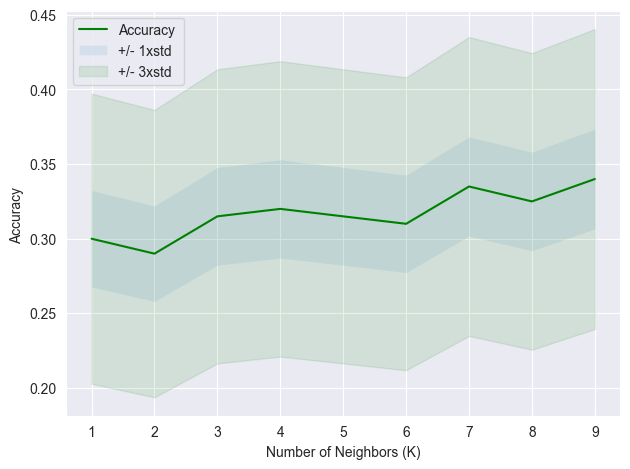

In [72]:
plt.plot(range(1,Ks),mean_acc,'g');
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10);
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green");
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'));
plt.ylabel('Accuracy ');
plt.xlabel('Number of Neighbors (K)');
plt.tight_layout();
plt.show();

In [74]:
print( "The best accuracy was with:", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with: 0.34 with k= 9
